In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, accuracy_score

In [72]:
data = pd.read_excel('/Users/navyatrilok/Documents/DATASCIENCE/Datasets/Sepsis.xls')

In [73]:
data

,Shock,Malnutrition,Alcoholism,Age,Infection,Death
0,0,0,0,56,0,0
1,0,0,0,80,0,0
2,0,0,0,61,0,0
3,0,0,0,26,0,0
4,0,0,0,53,0,0
...,...,...,...,...,...,...
101,0,1,1,49,0,0
102,0,0,0,25,0,0
103,1,1,0,44,0,0
104,0,0,1,56,0,0


In [ ]:
Insurance company do analysis when every per goes for surgery they do some predict where there is a chance of success
or chance of failure.
Insurance company has to pay lot of money in case of failure. so they do analysis.
Observations: All numerical data, already data is encoded, no encoding is needed, already dummy columns are created
During surgery, given shock, malnutrition, alcoholism, age, infection what are the chances or deapth being occured
or what are the chances of deapth not being occured. What are the chances of success and what are the chances of 
failure

In [75]:
data[data['Death'] == 1]

,Shock,Malnutrition,Alcoholism,Age,Infection,Death
5,0,1,0,87,0,1
7,0,0,1,69,0,1
10,0,0,1,66,1,1
18,1,1,0,60,1,1
23,1,0,0,63,1,1
28,1,1,0,70,0,1
31,0,0,1,49,0,1
37,1,0,0,78,1,1
39,1,1,0,57,0,1
53,0,1,0,50,1,1


In [90]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [94]:
y.value_counts()

Death
0    85
1    21
Name: count, dtype: int64

In [95]:
model = LogisticRegression()
model.fit(X,y)

LogisticRegression()

In [96]:
#in linear regression, if we have w's and b, we understand, for every increase in x, y increase by w and some bias
#in logistic regression we can understand anything from w's and b, there are no insights with it, because we require 
#the result of sigmoid not w's and b
#here we get array of lists, in linear regression it is list
w,b = model.coef_[0],model.intercept_[0]
w,b
#what is the meaning of 1.69 * shock? we don't understand anything

(array([1.69740167, 0.68381306, 1.65514545, 0.06035692, 1.25885412]),
 -6.189819786640072)

In [97]:
y_predict = X.dot(w)+b
y_predict

0     -2.809832
1     -1.361266
2     -2.508047
3     -4.620540
4     -2.990903
         ...   
101   -0.893372
102   -4.680897
103   -1.152900
104   -1.154687
105   -1.315870
Length: 106, dtype: float64

In [98]:
y_predict = X.dot(w)+b
y_predict = 1/(1+np.exp(-y_predict))
y_predict
#0.204035 ---> 20% probability that death will occure, 80% probability death will not occur
#0.056795 ---> 0.5% death will occur

0      0.056795
1      0.204035
2      0.075296
3      0.009751
4      0.047839
         ...   
101    0.290414
102    0.009186
103    0.239960
104    0.239634
105    0.211506
Length: 106, dtype: float64

In [ ]:
Now we what to give insights to the doctor.
not like patient has shock, infection, age is 89 so death will occur
We want to give generalized insights


In [ ]:
We have all data categorical
only age is continues

In [93]:
data.Age.describe()

count    106.000000
mean      51.283019
std       20.787705
min       17.000000
25%       33.000000
50%       52.500000
75%       68.750000
max       94.000000
Name: Age, dtype: float64

In [167]:
p1 = []
for i in range(15,96):
    y_predict = 1*w[0]+1*w[1]+1*w[2]+i*w[3]+1*w[4]+b #probability of death if the patient is in shock,patient has malnutrient, patient is alcoholic and patient has infection
    p1.append(1/(1+np.exp(-y_predict)))
p1[:10]

[0.5026870667374586,
 0.517768837576732,
 0.5328183033038629,
 0.5478082845963423,
 0.5627120318894284,
 0.5775034140997204,
 0.5921570979880559,
 0.6066487156114875,
 0.6209550176157229,
 0.635054010469909]

In [168]:
p2 = []
for i in range(15,96):
    y_predict = 1*w[0]+0*w[1]+0*w[2]+i*w[3]+1*w[4]+b #probability of death if the patient is in shock,patient has malnutrient, patient is alcoholic and patient has infection
    p2.append(1/(1+np.exp(-y_predict)))

In [169]:
p3 = []
for i in range(15,96):
    y_predict = 1*w[0]+0*w[1]+1*w[2]+i*w[3]+0*w[4]+b #probability of death if the patient is in shock,patient has malnutrient, patient is alcoholic and patient has infection
    p3.append(1/(1+np.exp(-y_predict)))
    #if p3 line comes above the blue line then we understand that alcoholism has more effect on failure

In [170]:
p4 = []
for i in range(15,96):
    y_predict = 0*w[0]+0*w[1]+0*w[2]+i*w[3]+0*w[4]+b #probability of death if the patient is in shock,patient has malnutrient, patient is alcoholic and patient has infection
    p4.append(1/(1+np.exp(-y_predict)))
    #no add habits, patient is health, probability of success is high

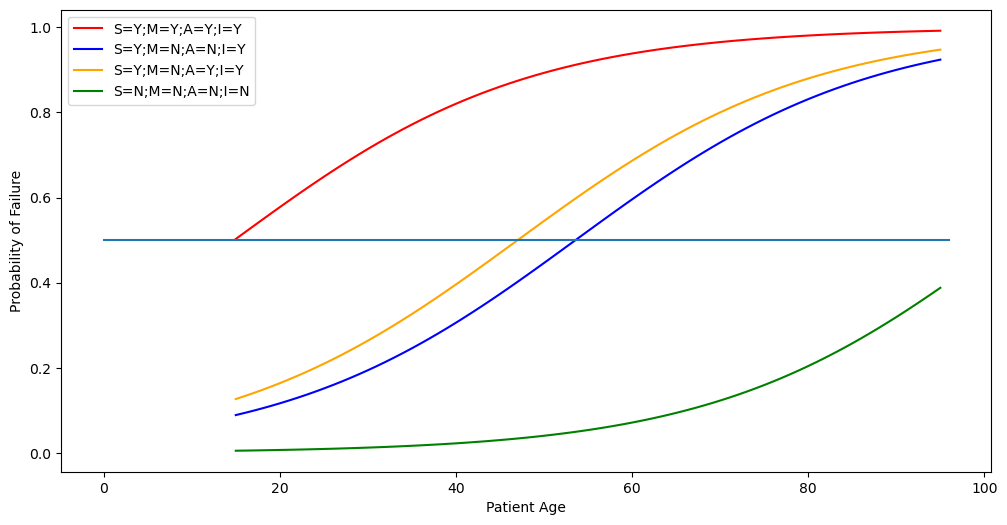

In [171]:
plt.figure(figsize=[12,6])
plt.plot(range(15,96),p1,label='S=Y;M=Y;A=Y;I=Y',c='red')
plt.plot(range(15,96),p2,label='S=Y;M=N;A=N;I=Y',c='blue')
plt.plot(range(15,96),p3,label='S=Y;M=N;A=Y;I=Y',c='orange')
plt.plot(range(15,96),p4,label='S=N;M=N;A=N;I=N',c='green')
plt.plot([0,96],[0.5,0.5])
plt.xlabel('Patient Age')
plt.ylabel('Probability of Failure')
plt.legend()
plt.show()

In [ ]:
As patient age is increasing, probability of failure is increasing

In [174]:
p1 = []
for i in range(15,96):
    y_predict = 1*w[0]+1*w[1]+1*w[2]+i*w[3]+1*w[4]+b #probability of death if the patient is in shock,patient has malnutrient, patient is alcoholic and patient has infection
    p1.append(1-1/(1+np.exp(-y_predict)))

In [175]:
p2 = []
for i in range(15,96):
    y_predict = 1*w[0]+0*w[1]+0*w[2]+i*w[3]+1*w[4]+b #probability of death if the patient is in shock,patient has malnutrient, patient is alcoholic and patient has infection
    p2.append(1-1/(1+np.exp(-y_predict)))

In [176]:
p3 = []
for i in range(15,96):
    y_predict = 1*w[0]+0*w[1]+1*w[2]+i*w[3]+0*w[4]+b #probability of death if the patient is in shock,patient has malnutrient, patient is alcoholic and patient has infection
    p3.append(1-1/(1+np.exp(-y_predict)))
    #if p3 line comes above the blue line then we understand that alcoholism has more effect on failure

In [177]:
p4 = []
for i in range(15,96):
    y_predict = 0*w[0]+0*w[1]+0*w[2]+i*w[3]+0*w[4]+b #probability of death if the patient is in shock,patient has malnutrient, patient is alcoholic and patient has infection
    p4.append(1-1/(1+np.exp(-y_predict)))
    #no add habits, patient is health, probability of success is high

In [178]:
p5 = []
for i in range(15,96):
    y_predict = 0*w[0]+0*w[1]+1*w[2]+i*w[3]+1*w[4]+b #probability of death if the patient is in shock,patient has malnutrient, patient is alcoholic and patient has infection
    p5.append(1-1/(1+np.exp(-y_predict)))
    #no add habits, patient is health, probability of success is high

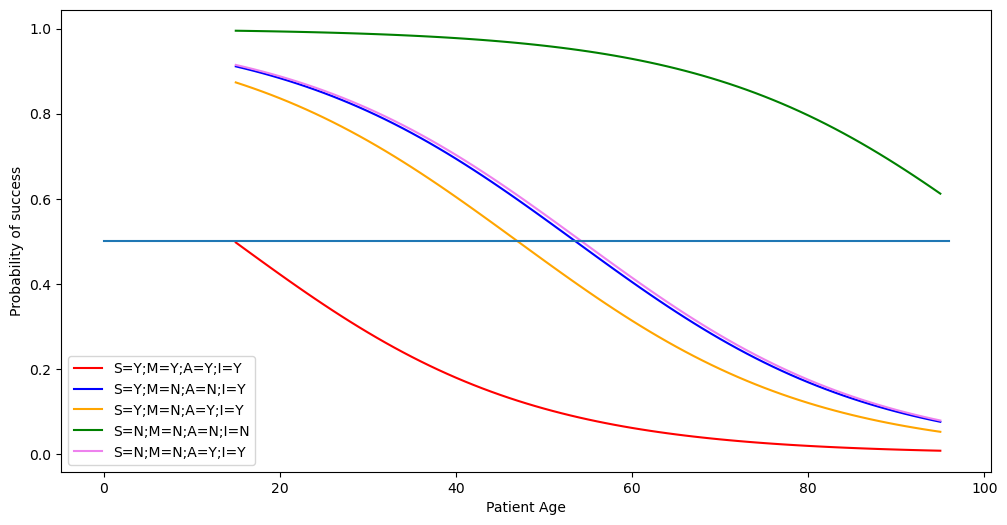

In [179]:
plt.figure(figsize=[12,6])
plt.plot(range(15,96),p1,label='S=Y;M=Y;A=Y;I=Y',c='red')
plt.plot(range(15,96),p2,label='S=Y;M=N;A=N;I=Y',c='blue')
plt.plot(range(15,96),p3,label='S=Y;M=N;A=Y;I=Y',c='orange')
plt.plot(range(15,96),p4,label='S=N;M=N;A=N;I=N',c='green')
plt.plot(range(15,96),p5,label='S=N;M=N;A=Y;I=Y',c='violet')
plt.plot([0,96],[0.5,0.5])
plt.xlabel('Patient Age')
plt.ylabel('Probability of success')
plt.legend()
plt.show()

In [ ]:
AS age is increasing probability of success is decreasing

In [186]:
y_predict = model.predict(X) #model will predict 
y_predict

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [182]:
model.predict_proba(X)[:10] #gives lables and probabilities

array([[0.94320482, 0.05679518],
       [0.79596536, 0.20403464],
       [0.92470405, 0.07529595],
       [0.99024855, 0.00975145],
       [0.95216145, 0.04783855],
       [0.56339556, 0.43660444],
       [0.99277046, 0.00722954],
       [0.59147024, 0.40852976],
       [0.9398837 , 0.0601163 ],
       [0.71481395, 0.28518605]])

In [205]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=10,test_size=27)

In [206]:
y_test

66    0
35    0
84    1
48    0
47    0
42    0
59    0
85    0
3     0
41    0
2     0
26    0
43    0
14    0
61    0
52    0
19    0
1     0
98    0
70    0
86    1
97    1
80    0
38    0
53    1
75    0
95    0
Name: Death, dtype: int64

In [207]:
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.8888888888888888

In [208]:
y_predict = model.predict(X_test)
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0])

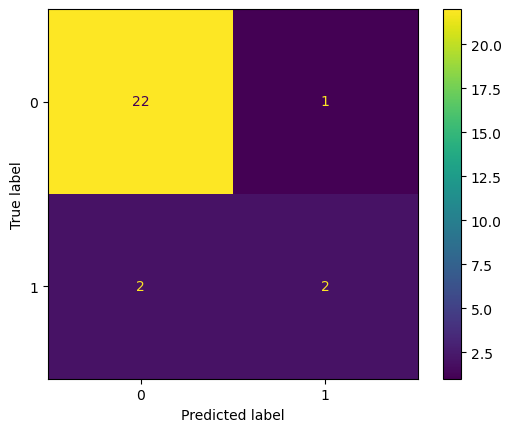

In [209]:
ConfusionMatrixDisplay.from_estimator(model,X_test,y_test)

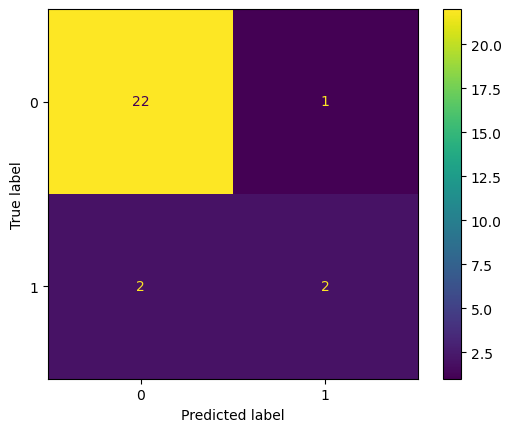

In [210]:
ConfusionMatrixDisplay.from_predictions(y_test,y_predict)